# Association Rule - Apriori and ECLAT 

Training association rule models (Apriori and ECLAT) to find the most related items bought by customers of a Online Retail . 

This algorithm associate products preferences by most of the customers and can be used to generate products recommendation and help on displaying products strategy.

#Source:

Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.



# Data Set Information:

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



# Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.



In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_excel('Online Retail.xlsx')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# EDA AND PREPROCESSING 

In [ ]:
# Add extra fields 
dataset['TotalAmount'] = dataset['Quantity'] * dataset['UnitPrice']
dataset['InvoiceYear'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceMonth'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceYearMonth'] = dataset['InvoiceYear'].map(str) + "-" + dataset['InvoiceMonth'].map(str)

In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID,TotalAmount,InvoiceYear,InvoiceMonth
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,2010.921609,7.553128
std,218.081158,96.759853,1713.600303,378.810824,0.268787,3.509055
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,2010.000000,1.000000
25%,1.000000,1.250000,13953.000000,3.400000,2011.000000,5.000000
50%,3.000000,2.080000,15152.000000,9.750000,2011.000000,8.000000
75%,10.000000,4.130000,16791.000000,17.400000,2011.000000,11.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,2011.000000,12.000000


In [ ]:
dataset.shape()

In [ ]:
# Total number of transactions
len(dataset['InvoiceNo'].unique())

25900

In [ ]:
# Number of transactions with anonymous customers 
len(dataset[dataset['CustomerID'].isnull()]['InvoiceNo'].unique())

3710

In [ ]:
# Total numbers of customers - +1 for null users
len(dataset['CustomerID'].unique())

4373

In [ ]:
# Total profit
sum(dataset['TotalAmount'])

9747747.93400317

In [ ]:
# Get top ranked ranked customers based on the total amount
customers_amounts = dataset.groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
customers_amounts.head(20)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
13089.0     57385.88
14096.0     57120.91
15061.0     54228.74
17949.0     52750.84
15769.0     51823.72
16029.0     50992.61
14298.0     50862.44
14088.0     50415.49
17841.0     40340.78
13798.0     36351.42
Name: TotalAmount, dtype: float64

# VISUALISATION 

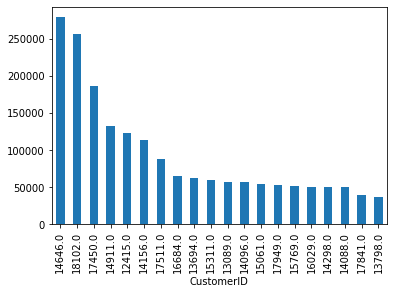

In [ ]:
customers_amounts.head(20).plot.bar()

In [ ]:
# Frequently sold items by quantitiy
gp_stockcode = dataset.groupby('Description')
gp_stockcode_frq_quantitiy = gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_quantitiy.head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53847
JUMBO BAG RED RETROSPOT               47363
ASSORTED COLOUR BIRD ORNAMENT         36381
POPCORN HOLDER                        36334
PACK OF 72 RETROSPOT CAKE CASES       36039
WHITE HANGING HEART T-LIGHT HOLDER    35317
RABBIT NIGHT LIGHT                    30680
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26315
PACK OF 60 PINK PAISLEY CAKE CASES    24753
VICTORIAN GLASS HANGING T-LIGHT       23854
ASSORTED COLOURS SILK FAN             23082
BROCADE RING PURSE                    23053
RED  HARMONICA IN BOX                 21866
JUMBO BAG PINK POLKADOT               21009
SMALL POPCORN HOLDER                  20116
PAPER CHAIN KIT 50'S CHRISTMAS        18902
LUNCH BAG RED RETROSPOT               18779
60 TEATIME FAIRY CAKE CASES           18040
PARTY BUNTING                         18022
Name: Quantity, dtype: int64

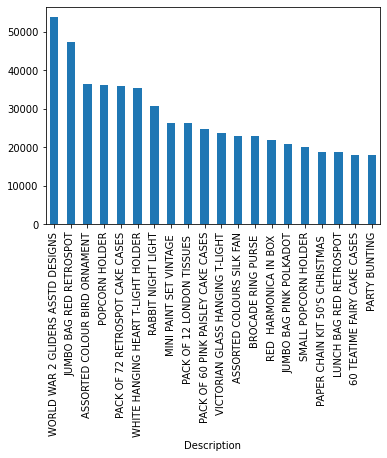

In [ ]:
gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [ ]:
# Frequently sold items by total amount
gp_stockcode_frq_amount = gp_stockcode['TotalAmount'].agg(np.sum).sort_values(ascending=False)
gp_stockcode_frq_amount.head(20)

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              164762.19
WHITE HANGING HEART T-LIGHT HOLDER     99668.47
PARTY BUNTING                          98302.98
JUMBO BAG RED RETROSPOT                92356.03
RABBIT NIGHT LIGHT                     66756.59
POSTAGE                                66230.64
PAPER CHAIN KIT 50'S CHRISTMAS         63791.94
ASSORTED COLOUR BIRD ORNAMENT          58959.73
CHILLI LIGHTS                          53768.06
SPOTTY BUNTING                         42065.32
JUMBO BAG PINK POLKADOT                41619.66
BLACK RECORD COVER FRAME               40596.96
PICNIC BASKET WICKER 60 PIECES         39619.50
SET OF 3 CAKE TINS PANTRY DESIGN       37413.44
DOORMAT KEEP CALM AND COME IN          36565.39
JAM MAKING SET WITH JARS               36116.09
WOOD BLACK BOARD ANT WHITE FINISH      35859.27
LUNCH BAG RED RETROSPOT                34897.31
POPCORN HOLDER                         33969.46
Name: TotalAmount, dtype: fl

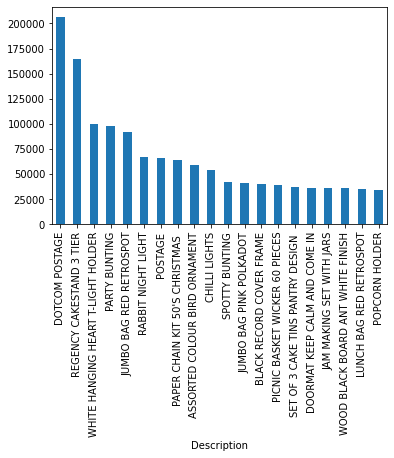

In [ ]:
gp_stockcode_frq_amount.head(20).plot.bar()

In [ ]:
# Explore by month
gp_month = dataset.sort_values('InvoiceDate').groupby(['InvoiceYear', 'InvoiceMonth'])

In [ ]:
# Month number of invoices
gp_month_invoices = gp_month['InvoiceNo'].unique().agg(np.size)
gp_month_invoices

InvoiceYear  InvoiceMonth
2010         12              2025
2011         1               1476
             2               1393
             3               1983
             4               1744
             5               2162
             6               2012
             7               1927
             8               1737
             9               2327
             10              2637
             11              3462
             12              1015
Name: InvoiceNo, dtype: int64

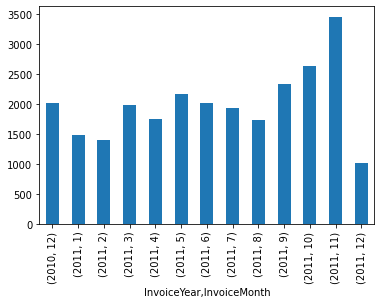

In [ ]:
gp_month_invoices.plot.bar()

In [ ]:
# Month total amounts
gp_month_frq_amount= gp_month['TotalAmount'].agg(np.sum)
gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010         12               748957.020
2011         1                560000.260
             2                498062.650
             3                683267.080
             4                493207.121
             5                723333.510
             6                691123.120
             7                681300.111
             8                682680.510
             9               1019687.622
             10              1070704.670
             11              1461756.250
             12               433668.010
Name: TotalAmount, dtype: float64

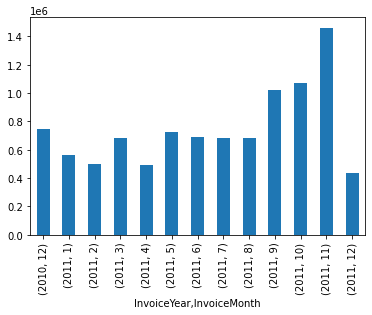

In [ ]:
gp_month_frq_amount.plot.bar()

In [ ]:
####################### Explore By Countries ###############
gp_country = dataset.groupby('Country')
# Order countries by total amount
gp_country['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom          8.187806e+06
Netherlands             2.846615e+05
EIRE                    2.632768e+05
Germany                 2.216982e+05
France                  1.974039e+05
Australia               1.370773e+05
Switzerland             5.638535e+04
Spain                   5.477458e+04
Belgium                 4.091096e+04
Sweden                  3.659591e+04
Japan                   3.534062e+04
Norway                  3.516346e+04
Portugal                2.936702e+04
Finland                 2.232674e+04
Channel Islands         2.008629e+04
Denmark                 1.876814e+04
Italy                   1.689051e+04
Cyprus                  1.294629e+04
Austria                 1.015432e+04
Hong Kong               1.011704e+04
Singapore               9.120390e+03
Israel                  7.907820e+03
Poland                  7.213140e+03
Unspecified             4.749790e+03
Greece                  4.710520e+03
Iceland                 4.310000e+03
Canada                  3.6663

In [ ]:
# Order countries by number of invoices
gp_country['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          23494
Germany                   603
France                    461
EIRE                      360
Belgium                   119
Spain                     105
Netherlands               101
Switzerland                74
Portugal                   71
Australia                  69
Italy                      55
Finland                    48
Sweden                     46
Norway                     40
Channel Islands            33
Japan                      28
Poland                     24
Denmark                    21
Cyprus                     20
Austria                    19
Hong Kong                  15
Unspecified                13
Malta                      10
Singapore                  10
Israel                      9
Iceland                     7
USA                         7
Greece                      6
Canada                      6
European Community          5
Czech Republic              5
Lithuania                   4
Bahrain                     4
Un

In [ ]:
# Order countries by number of customers
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          3951
Germany                   95
France                    88
Spain                     31
Belgium                   25
Switzerland               22
Portugal                  20
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Channel Islands            9
Denmark                    9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Unspecified                5
Israel                     5
Greece                     4
USA                        4
EIRE                       4
Canada                     4
Bahrain                    3
United Arab Emirates       2
Malta                      2
Singapore                  1
Brazil                     1
Iceland                    1
Saudi Arabia               1
Hong Kong                  1
RSA                        1
Europe

In [ ]:
# Work on undefined customers
gp_country_null = dataset[dataset['CustomerID'].isnull()].groupby('Country')
# Order countries by total amount [For the undefined users]
gp_country_null['TotalAmount'].agg(np.sum).sort_values(ascending=False)

Country
United Kingdom    1419932.97
EIRE                12991.60
Hong Kong           10117.04
Unspecified          2082.72
Israel                913.57
France                691.06
Switzerland           645.95
Portugal              307.21
Bahrain                 0.00
Name: TotalAmount, dtype: float64

In [ ]:
# Order countries by number of invoices [For the undefined users]
gp_country_null['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom    3637
EIRE                41
Hong Kong           15
Unspecified          5
Switzerland          3
Israel               3
France               3
Bahrain              2
Portugal             1
Name: InvoiceNo, dtype: int64

In [ ]:
# Explore more info about United Kingdom invoices because it has the max total amount
# Get United Kingdom top ranked customers based on the total amount
uk_customers_amounts = dataset[dataset['Country']=='United Kingdom'].groupby('CustomerID')['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_customers_amounts.head(20)

CustomerID
18102.0    256438.49
17450.0    187482.17
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
13089.0     57385.88
14096.0     57120.91
15061.0     54228.74
17949.0     52750.84
15769.0     51823.72
16029.0     50992.61
14298.0     50862.44
14088.0     50415.49
17841.0     40340.78
13798.0     36351.42
16422.0     33805.69
12931.0     33462.81
16013.0     33366.25
15838.0     33350.76
Name: TotalAmount, dtype: float64

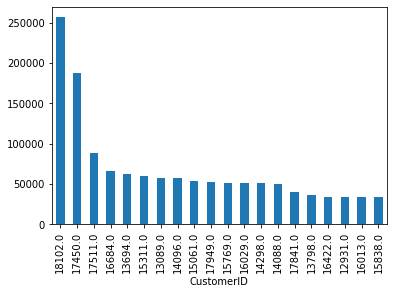

In [ ]:
uk_customers_amounts.head(20).plot.bar()

In [ ]:
# United Kingdom frequently sold items by quantitiy
uk_gp_stockcode = dataset[dataset['Country']=='United Kingdom'].groupby('Description')
uk_gp_stockcode_frq_quantitiy = uk_gp_stockcode['Quantity'].agg(np.sum).sort_values(ascending=False)
uk_gp_stockcode_frq_quantitiy.head(20)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      48326
JUMBO BAG RED RETROSPOT                43167
POPCORN HOLDER                         34365
ASSORTED COLOUR BIRD ORNAMENT          33679
WHITE HANGING HEART T-LIGHT HOLDER     33193
PACK OF 12 LONDON TISSUES              25307
PACK OF 72 RETROSPOT CAKE CASES        24702
VICTORIAN GLASS HANGING T-LIGHT        23242
BROCADE RING PURSE                     22801
ASSORTED COLOURS SILK FAN              20322
PACK OF 60 PINK PAISLEY CAKE CASES     20288
JUMBO BAG PINK POLKADOT                18936
SMALL POPCORN HOLDER                   18563
PAPER CHAIN KIT 50'S CHRISTMAS         18197
RED  HARMONICA IN BOX                  17754
HEART OF WICKER SMALL                  17394
PARTY BUNTING                          16709
JUMBO BAG STRAWBERRY                   16056
CHARLOTTE BAG SUKI DESIGN              15974
COLOUR GLASS T-LIGHT HOLDER HANGING    15400
Name: Quantity, dtype: int64

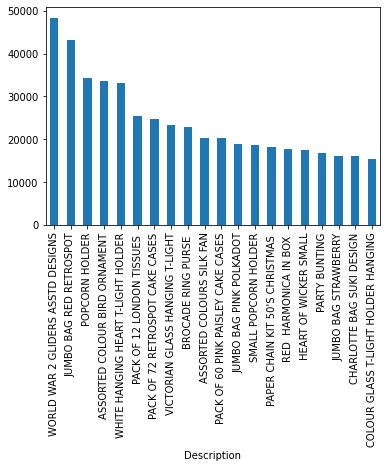

In [ ]:
uk_gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [ ]:
# Frequently sold items by total amount
uk_gp_stockcode_frq_amount = uk_gp_stockcode['TotalAmount'].agg(np.sum).sort_values(ascending=False)
uk_gp_stockcode_frq_amount.head(20)

Description
DOTCOM POSTAGE                        206245.48
REGENCY CAKESTAND 3 TIER              134405.94
WHITE HANGING HEART T-LIGHT HOLDER     93953.07
PARTY BUNTING                          92501.73
JUMBO BAG RED RETROSPOT                84516.44
PAPER CHAIN KIT 50'S CHRISTMAS         61888.19
ASSORTED COLOUR BIRD ORNAMENT          54662.15
CHILLI LIGHTS                          52986.86
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               39387.00
RABBIT NIGHT LIGHT                     37894.16
JUMBO BAG PINK POLKADOT                37754.82
SPOTTY BUNTING                         36625.12
DOORMAT KEEP CALM AND COME IN          35469.34
WOOD BLACK BOARD ANT WHITE FINISH      34960.97
POPCORN HOLDER                         32425.81
HOT WATER BOTTLE TEA AND SYMPATHY      31888.99
VICTORIAN GLASS HANGING T-LIGHT        31683.17
HEART OF WICKER SMALL                  31186.55
JUMBO BAG STRAWBERRY                   30514.32
Name: TotalAmount, dtype: fl

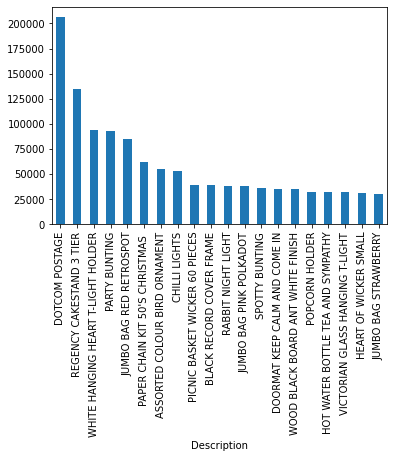

In [ ]:
uk_gp_stockcode_frq_amount.head(20).plot.bar()

In [ ]:
# Explore United Kingdom by month
uk_gp_month = dataset[dataset['Country']=='United Kingdom'].groupby(['InvoiceYear', 'InvoiceMonth'])
# United Kingdom By Month number of invoices
uk_gp_month_invoices = uk_gp_month['InvoiceNo'].unique().agg(np.size)
uk_gp_month_invoices

InvoiceYear  InvoiceMonth
2010         12              1885
2011         1               1327
             2               1259
             3               1802
             4               1622
             5               1973
             6               1830
             7               1764
             8               1546
             9               2090
             10              2361
             11              3113
             12               922
Name: InvoiceNo, dtype: int64

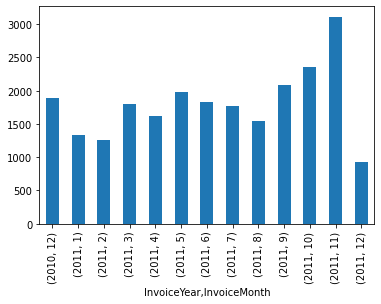

In [ ]:
uk_gp_month_invoices.plot.bar()

In [ ]:
# United Kingdom By Month total amounts
uk_gp_month_frq_amount= uk_gp_month['TotalAmount'].agg(np.sum)
uk_gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010         12               676742.620
2011         1                434308.300
             2                408247.910
             3                559707.390
             4                442254.041
             5                596459.860
             6                554478.350
             7                565479.841
             8                539130.500
             9                862018.152
             10               877438.190
             11              1282805.780
             12               388735.430
Name: TotalAmount, dtype: float64

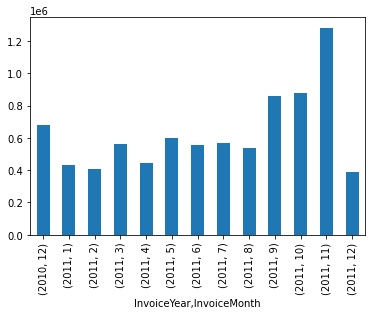

In [ ]:
uk_gp_month_frq_amount.plot.bar()

In [ ]:
## Part2. Get Association Rules
#################################
#set null description = stockCode
len(dataset[dataset['Description'].isnull()])

1454

In [ ]:
for i, d in dataset[dataset['Description'].isnull()].iterrows():
    dataset['Description'][i] = "Code-" + str(d['StockCode'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(dataset[dataset['Description']==dataset['StockCode'].map(lambda x: "Code-"+str(x))])

1454

In [ ]:
# Set transactions
gp_invoiceno = dataset.groupby('InvoiceNo')
transactions = []
for name,group in gp_invoiceno:
    transactions.append(list(group['Description'].map(str)))

In [ ]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=2c4f597d4cb307fe245d7862968ba6162b6ca50c50962c30aaf35c1422b08a4f
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
# Training Apriori on the dataset
# Needs to import https://pypi.python.org/pypi/apyori/1.0.0
from apyori import apriori
rules = apriori(transactions, min_support = 0.005, min_confidence = 0.2, min_lift = 3, min_length = 2)
# Get the results
results = list(rules)

In [ ]:
# Visualising the result as a readeable dataframe
final_results = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0
for g, s, i in results:
    final_results.iloc[index] = [' _&&_ '.join(list(g)), ' _&&_ '.join(list(i[0][0])), ' _&&_ '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
# The most significant rules
final_results = final_results.sort_values('Lift', ascending=0)
final_results.head(20)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
4601,HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&...,HERB MARKER CHIVES,HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&...,0.006564,0.809524,112.121212
4330,HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&...,HERB MARKER CHIVES,HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&...,0.006718,0.828571,110.051282
4329,HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY ...,HERB MARKER CHIVES,HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY ...,0.006757,0.833333,109.560068
4332,HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&...,HERB MARKER CHIVES,HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&...,0.006911,0.852381,108.218954
4331,HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&...,HERB MARKER CHIVES,HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&...,0.006641,0.819048,107.138047
3170,HERB MARKER PARSLEY _&&_ HERB MARKER CHIVES _...,HERB MARKER CHIVES,HERB MARKER PARSLEY _&&_ HERB MARKER MINT,0.007104,0.876190,106.541471
3174,HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&...,HERB MARKER CHIVES,HERB MARKER THYME _&&_ HERB MARKER PARSLEY,0.007104,0.876190,106.043614
3172,HERB MARKER THYME _&&_ HERB MARKER CHIVES _&&...,HERB MARKER CHIVES,HERB MARKER THYME _&&_ HERB MARKER MINT,0.006834,0.842857,105.458937
3173,HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY ...,HERB MARKER CHIVES,HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY,0.007104,0.876190,105.061728
2312,SET/6 COLLAGE PAPER CUPS _&&_ SET/6 COLLAGE PA...,SET/6 COLLAGE PAPER CUPS,SET/6 COLLAGE PAPER PLATES,0.006255,0.890110,104.790210


# RULE GENERATION

In [ ]:
count=1
for i, d in final_results.head(20).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(d['Support'])+' - Confidence: '+str(d['Confidence'])+' - Lift: '+str(d['Lift']))
    print('--------------------')
    count=count+1

Rule #1:
HERB MARKER CHIVES 
=> HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER MINT
Support: 0.006563706563706564 - Confidence: 0.8095238095238095 - Lift: 112.12121212121211
--------------------
Rule #2:
HERB MARKER CHIVES 
=> HERB MARKER THYME _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER MINT
Support: 0.006718146718146718 - Confidence: 0.8285714285714285 - Lift: 110.05128205128204
--------------------
Rule #3:
HERB MARKER CHIVES 
=> HERB MARKER ROSEMARY _&&_ HERB MARKER PARSLEY _&&_ HERB MARKER MINT
Support: 0.006756756756756757 - Confidence: 0.8333333333333334 - Lift: 109.5600676818951
--------------------
Rule #4:
HERB MARKER CHIVES 
=> HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&&_ HERB MARKER PARSLEY
Support: 0.006911196911196911 - Confidence: 0.8523809523809524 - Lift: 108.21895424836602
--------------------
Rule #5:
HERB MARKER CHIVES 
=> HERB MARKER ROSEMARY _&&_ HERB MARKER THYME _&&_ HERB MARKER MINT
Support: 0.006640926640926641 - Confid

## ECLAT

In [13]:
df = pd.read_excel('Online Retail.xlsx').loc[2000:3000]


In [14]:

# Adding all customers into a list of lists
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, 7)])

In [15]:
# Putting all transactions in a single list
itens = []
for i in range(0, len(transactions)):
    itens.extend(transactions[i])

# Finding unique items from transactions and removing nan
uniqueItems = list(set(itens))
uniqueItems.remove('nan')

In [16]:
uniqueItems

['CREAM SWEETHEART LETTER RACK',
 'PACK 3 BOXES CHRISTMAS PANNETONE',
 '22324',
 '21671',
 '85008',
 '22847',
 '536566',
 '22114',
 '2010-12-01 15:06:00',
 '22745',
 'BREAD BIN DINER STYLE PINK',
 'SUNSET COLOUR CHUNKY KNITTED THROW',
 '22969',
 'FELTCRAFT HAIRBAND PINK AND BLUE',
 '82580',
 '536570',
 '21523',
 'GLITTER HEART GARLAND WITH BELLS ',
 'RED TEA TOWEL CLASSIC DESIGN',
 'COSMETIC BAG VINTAGE ROSE PAISLEY',
 'SET OF 3 NOTEBOOKS IN PARCEL',
 'SET OF 12  VINTAGE POSTCARD SET',
 '22818',
 '15056P',
 'ASSORTED TUTTI FRUTTI MIRROR',
 'EMPIRE TISSUE BOX',
 '22972',
 'CERAMIC PIRATE CHEST MONEY BANK',
 'WOODEN UNION JACK BUNTING',
 'FELTCRAFT DOLL EMILY',
 '21314',
 '84509A',
 '22278',
 'ENVELOPE 50 BLOSSOM IMAGES',
 '90214M',
 '79302M',
 '6.77',
 'SWISS ROLL TOWEL, CHOCOLATE  SPOTS',
 'GROW YOUR OWN PLANT IN A CAN ',
 'MAGNETS PACK OF 4 RETRO PHOTO',
 'WOODEN OWLS LIGHT GARLAND ',
 '20749',
 '21547',
 'TRIPLE PHOTO FRAME CORNICE ',
 'WASHROOM METAL SIGN',
 'BATH BUILDING BLOCK WOR

In [17]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;   

In [18]:
pair

[['CREAM SWEETHEART LETTER RACK', 'PACK 3 BOXES CHRISTMAS PANNETONE'],
 ['CREAM SWEETHEART LETTER RACK', '22324'],
 ['CREAM SWEETHEART LETTER RACK', '21671'],
 ['CREAM SWEETHEART LETTER RACK', '85008'],
 ['CREAM SWEETHEART LETTER RACK', '22847'],
 ['CREAM SWEETHEART LETTER RACK', '536566'],
 ['CREAM SWEETHEART LETTER RACK', '22114'],
 ['CREAM SWEETHEART LETTER RACK', '2010-12-01 15:06:00'],
 ['CREAM SWEETHEART LETTER RACK', '22745'],
 ['CREAM SWEETHEART LETTER RACK', 'BREAD BIN DINER STYLE PINK'],
 ['CREAM SWEETHEART LETTER RACK', 'SUNSET COLOUR CHUNKY KNITTED THROW'],
 ['CREAM SWEETHEART LETTER RACK', '22969'],
 ['CREAM SWEETHEART LETTER RACK', 'FELTCRAFT HAIRBAND PINK AND BLUE'],
 ['CREAM SWEETHEART LETTER RACK', '82580'],
 ['CREAM SWEETHEART LETTER RACK', '536570'],
 ['CREAM SWEETHEART LETTER RACK', '21523'],
 ['CREAM SWEETHEART LETTER RACK', 'GLITTER HEART GARLAND WITH BELLS '],
 ['CREAM SWEETHEART LETTER RACK', 'RED TEA TOWEL CLASSIC DESIGN'],
 ['CREAM SWEETHEART LETTER RACK', 'CO

In [11]:
#### Calculating score
The calculation is done looking at the number of customers that bought both items (the pair) and divided by all customers of the week (7501). This calculation is done for all pairs possible and the score is returned on "score" list.

$ score = \frac{\text{number of lists that contain [item x and item y]}} {\text{number of all lists}} $

SyntaxError: ignored

In [19]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score.append(len(eval(mycode))/7501.)

SyntaxError: ignored

In [10]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

NameError: ignored

In [14]:
ranking_ECLAT.sort_values('Score', ascending=False).head(10)

,Pair,Score
0,"[KNITTED UNION FLAG HOT WATER BOTTLE, 10125]",0
34,"[KNITTED UNION FLAG HOT WATER BOTTLE, 22478]",0
25,"[KNITTED UNION FLAG HOT WATER BOTTLE, CANDY SH...",0
26,"[KNITTED UNION FLAG HOT WATER BOTTLE, 22604]",0
27,"[KNITTED UNION FLAG HOT WATER BOTTLE, TOAST IT...",0
28,"[KNITTED UNION FLAG HOT WATER BOTTLE, SMALL LI...",0
29,"[KNITTED UNION FLAG HOT WATER BOTTLE, 85132A]",0
30,"[KNITTED UNION FLAG HOT WATER BOTTLE, PAPER CH...",0
31,"[KNITTED UNION FLAG HOT WATER BOTTLE, PARTY IN...",0
32,"[KNITTED UNION FLAG HOT WATER BOTTLE, 22780]",0


# CREATING TRIOS

In [1]:
# Creating trios
trio = []
for j in range(0, len(uniqueItems)):
    for k in range(j, len(uniqueItems)):
        for l in range(k, len(uniqueItems)):
            if (k != j) and (j != l) and (k != l):
                try:
                    trio.append([uniqueItems[j], uniqueItems[j+k], uniqueItems[j+l]])
                except IndexError:
                    pass 

NameError: ignored

In [ ]:
trio[:5]

In [ ]:
%%time
score_trio = []
for i in trio:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in transactions if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score_trio.append(len(eval(mycode))/7501.)

In [ ]:
ranking_ECLAT_trio = pd.DataFrame([trio, score_trio]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=False).head(10)